In [1]:
# dataframe
import pandas as pd
import numpy as np

# logistic regression
from sklearn.linear_model import LogisticRegression

# XGBoost
import xgboost as xgb

# train/test split
from sklearn.model_selection import train_test_split

# confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# config file
pd.set_option('display.max_columns', 100)
from pyaml_env import parse_config
config = parse_config('config.yaml')


In [2]:
# load dataset, filter to feature columns
df = pd.read_pickle('data/generated_games2.pkl')
feature_col = [str(x) + '_team0' for x in config['scoring_ranges_extended'].keys()]
feature_col.extend([str(x) + '_team1' for x in config['scoring_ranges_extended'].keys()])
target_col = config['target_variable']

In [3]:
target_col

'team1_victory'

In [4]:
feature_col

['s1_team0',
 's2_team0',
 'a1_team0',
 'a2_team0',
 'a3_team0',
 'a4_team0',
 'b1_team0',
 'b2_team0',
 'b3_team0',
 'b4_team0',
 'b5_team0',
 'b6_team0',
 'b7_team0',
 'b8_team0',
 'b9_team0',
 'c1_team0',
 'c2_team0',
 'c3_team0',
 'c4_team0',
 'c5_team0',
 'c6_team0',
 'c7_team0',
 'c8_team0',
 'c9_team0',
 'd1_team0',
 'd2_team0',
 'd3_team0',
 'd4_team0',
 'n1_team0',
 'n2_team0',
 's1_team1',
 's2_team1',
 'a1_team1',
 'a2_team1',
 'a3_team1',
 'a4_team1',
 'b1_team1',
 'b2_team1',
 'b3_team1',
 'b4_team1',
 'b5_team1',
 'b6_team1',
 'b7_team1',
 'b8_team1',
 'b9_team1',
 'c1_team1',
 'c2_team1',
 'c3_team1',
 'c4_team1',
 'c5_team1',
 'c6_team1',
 'c7_team1',
 'c8_team1',
 'c9_team1',
 'd1_team1',
 'd2_team1',
 'd3_team1',
 'd4_team1',
 'n1_team1',
 'n2_team1']

In [5]:
df.head(1)

,game_id,s1_team0,s1_team1,s1_goals,s2_team0,s2_team1,s2_goals,a1_team0,a1_team1,a1_goals,a2_team0,a2_team1,a2_goals,a3_team0,a3_team1,a3_goals,a4_team0,a4_team1,a4_goals,b1_team0,b1_team1,b1_goals,b2_team0,b2_team1,b2_goals,b3_team0,b3_team1,b3_goals,b4_team0,b4_team1,b4_goals,b5_team0,b5_team1,b5_goals,b6_team0,b6_team1,b6_goals,b7_team0,b7_team1,b7_goals,b8_team0,b8_team1,b8_goals,b9_team0,b9_team1,b9_goals,c1_team0,c1_team1,c1_goals,c2_team0,c2_team1,c2_goals,c3_team0,c3_team1,c3_goals,c4_team0,c4_team1,c4_goals,c5_team0,c5_team1,c5_goals,c6_team0,c6_team1,c6_goals,c7_team0,c7_team1,c7_goals,c8_team0,c8_team1,c8_goals,c9_team0,c9_team1,c9_goals,d1_team0,d1_team1,d1_goals,d2_team0,d2_team1,d2_goals,d3_team0,d3_team1,d3_goals,d4_team0,d4_team1,d4_goals,n1_team0,n1_team1,n1_goals,n2_team0,n2_team1,n2_goals,score_difference,team1_victory
0,1,1,0,3,1,0,2,0,1,2,0,1,2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,-1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,-1,0,1,-1,1,0,-1,0,1,-2,0,0,0,0,0,0,0,0,0,-2,0


In [6]:
# split dataframe into target and feature columns
df_base = df[feature_col]
df_target = df[target_col]

In [7]:
# train/test split with set state
x_train, x_test, y_train, y_test = train_test_split(df_base, df_target, test_size=0.25, random_state=0)

## Logistic Regression

In [8]:
# default logistic regression
model = LogisticRegression()
# training
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
# predict on test
y_pred = model.predict(x_test)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[95 34]
 [27 94]]


Text(0.5, 427.9555555555555, 'Predicted label')

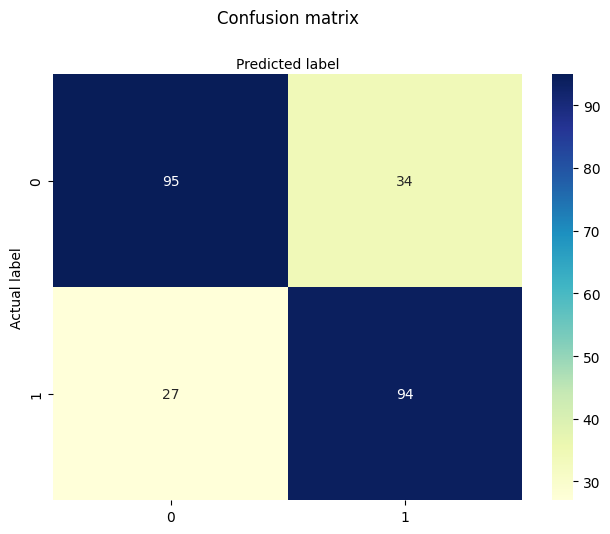

In [10]:
# Better looking confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The basic logistic regression model predicts less accurately on the extended dataset

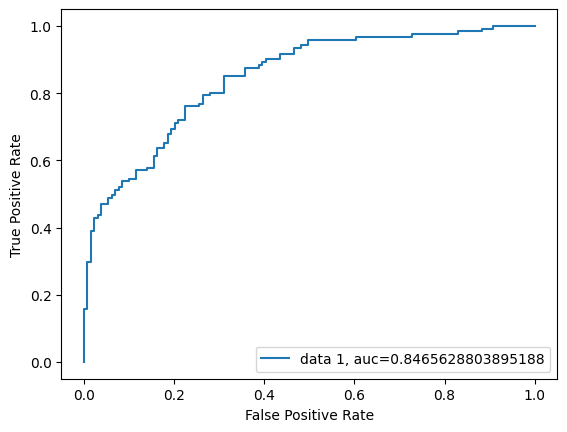

In [11]:
# ROC curve
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

ROC curve shows the trade off between true and false positive rates as we vary the threshold for determination. The model performs ok

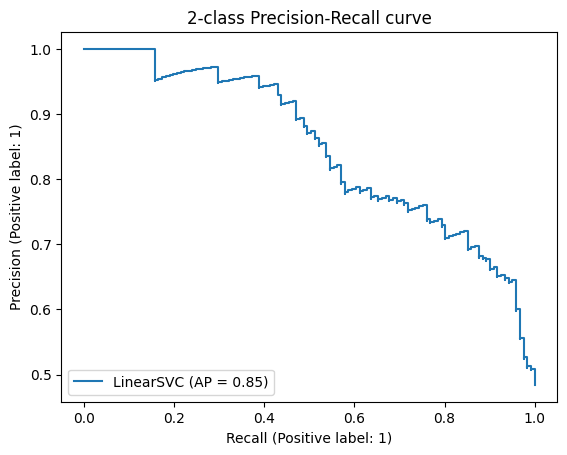

In [12]:
display = metrics.PrecisionRecallDisplay.from_estimator(
    model, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Here we see the trade off between precision and recall across possible thresholds

In [13]:
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.734375
Recall: 0.776860
F1 score: 0.755020


In [14]:
feat_importance = pd.DataFrame(data={
    'Player': x_train.columns,
    'Weight': model.coef_[0]
})
feat_importance = feat_importance.sort_values(by='Weight', ascending=False)

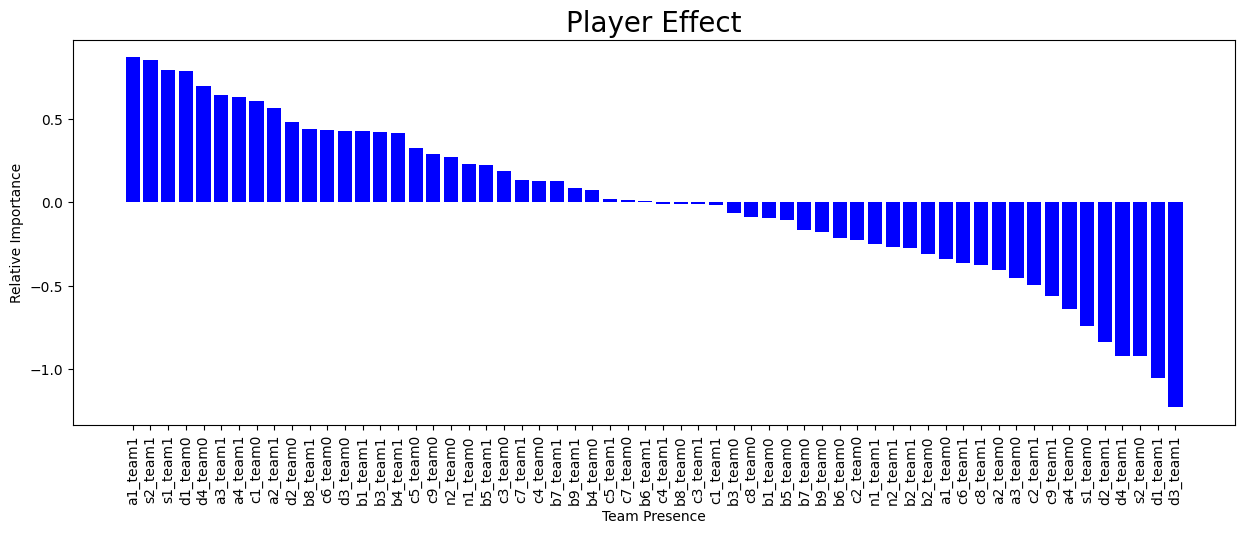

In [15]:
plt.figure(figsize=(15,5))
plt.bar(x=feat_importance['Player'], height=feat_importance['Weight'], color='blue')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Player Effect', size=20)
plt.xticks(rotation='vertical')
plt.xlabel("Team Presence")
plt.ylabel("Relative Importance")
plt.show()

Quite the spread here. As anticipated, trend seems to be  the better place impact team1 victory positively on team 1, and engatively on team 0. For worse players, that observance is swapped.

## XGBoost

Now lets take the same dataset and see how an XGBoost model performs

In [16]:
model_xgb = xgb.XGBClassifier()

In [17]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
feat_importance_xgb = pd.DataFrame(data={
    'Player': x_train.columns,
    'Weight': model_xgb.feature_importances_
})
feat_importance_xgb = feat_importance_xgb.sort_values(by='Weight', ascending=False)

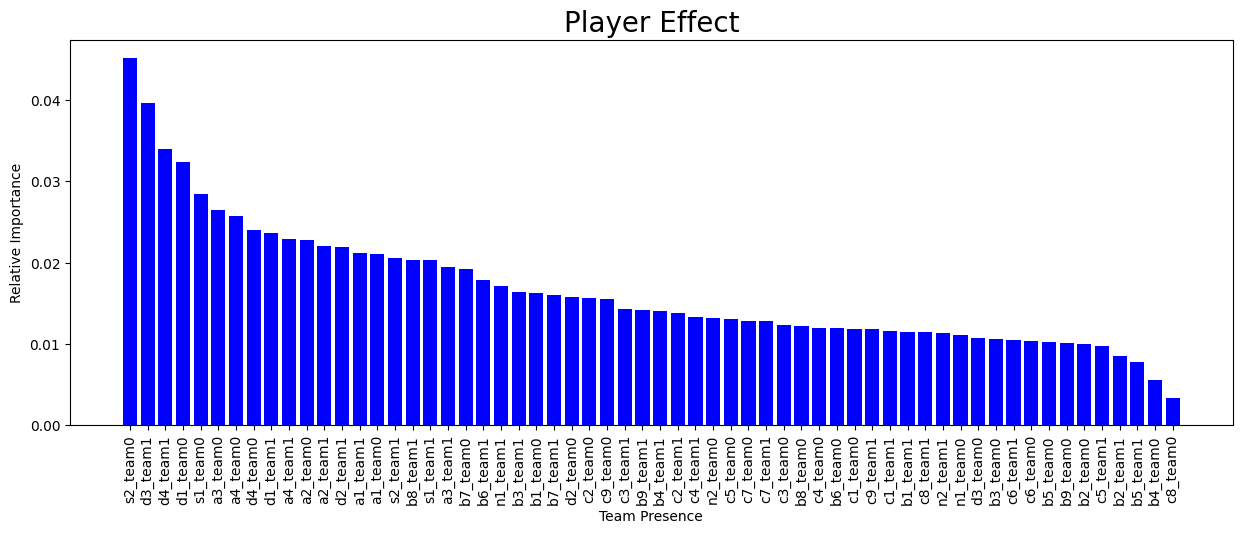

In [19]:
plt.figure(figsize=(15,5))
plt.bar(x=feat_importance_xgb['Player'], height=feat_importance_xgb['Weight'], color='blue')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Player Effect', size=20)
plt.xticks(rotation='vertical')
plt.xlabel("Team Presence")
plt.ylabel("Relative Importance")
plt.show()

The most beneficial/detrimental players are high importance

In [20]:
# predict on test
y_pred = model_xgb.predict(x_test)

# confusion matrix
cm_xgb = metrics.confusion_matrix(y_test, y_pred)
print(cm_xgb)

[[93 36]
 [25 96]]


Text(0.5, 427.9555555555555, 'Predicted label')

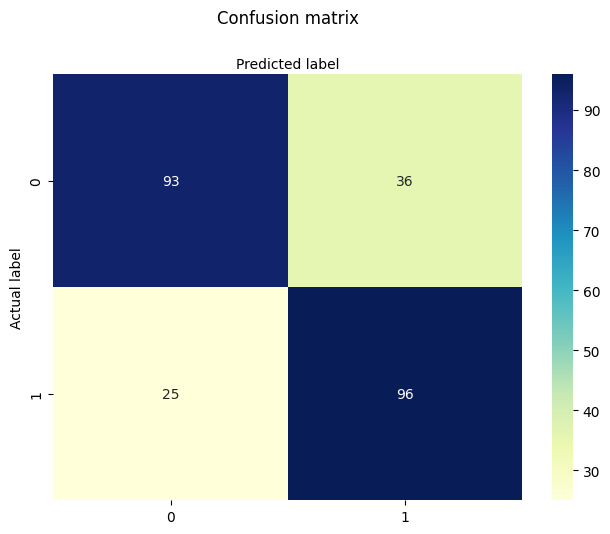

In [21]:
# Better looking confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_xgb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Our XGBoost model is less often correct than the logistic regression model on our validation set

In [22]:
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.727273
Recall: 0.793388
F1 score: 0.758893


Precision lower and but recall higher than logistic regression.

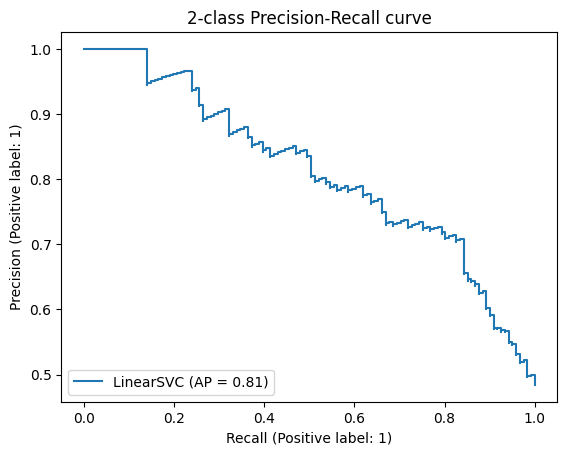

In [23]:
display = metrics.PrecisionRecallDisplay.from_estimator(
    model_xgb, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

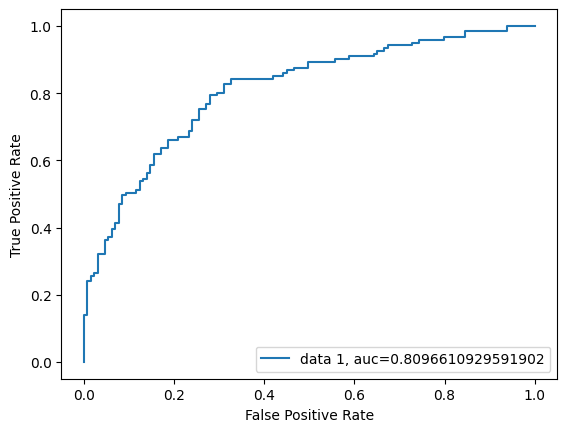

In [24]:
# ROC curve
y_pred_proba = model_xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Much worse ROC curve and a much more noticible trade-off in true positive and false positive rates, as well as recall/precision

## Conclusions and Next Steps

### Conclusion
So, is Logistic regression better? Well, maybe...

We have some evidence to move forward with a logistic regression model for this type of problem but there are still more experiments to perform. Adjustment of the threshold on the classifier could prove fruitful in both deciding between the offered models as well as tuning the choosen model for the metric we care about most, whether it be precision or recall or a combination of them represented by a third metric such as the F1 score. How these models perform on new data is of minimal concern as our random processes should have mapped much of the team possibilities, but for future endeavours we have to be a bit more careful for overfitting and how well the data extrapolates to the yet unseen population of possibilities.

### Next Steps
Next steps would be to optimize hyperparameters for the metric we most care about for our model. Additionally, seeing how the model performs with a much smaller sample would be interesting

How will Logistic Regression perform relative to XGBoost on a lesser dataset?